# Position Embeddings

In [ ]:
using Plots

## Sine-Cosine

In [ ]:
function make_postion_embedding(embedding_dim, seq_length, n=10000)
    embedding = Matrix{Float32}(undef, embedding_dim, seq_length)
    for ntoken in 1:seq_length
        for row in 0:2:(embedding_dim - 1)
            denom = 1/(n^(row/embedding_dim))
            embedding[row + 1, ntoken] = sin(ntoken * denom)
            embedding[row + 2, ntoken] = cos(ntoken * denom)
        end
    end
    embedding    
end

make_postion_embedding (generic function with 2 methods)

In [ ]:
pe = make_postion_embedding(32, 50);

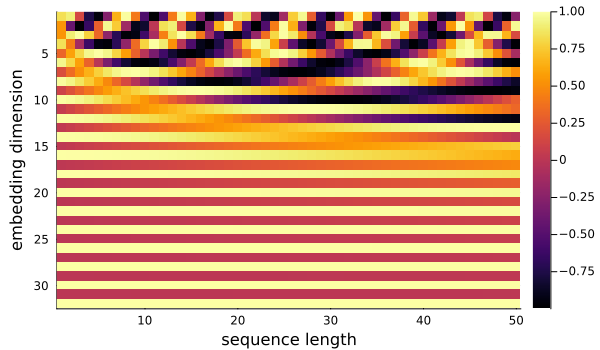

In [ ]:
p = heatmap(pe, aspectratio=1, 
    xlims=(0.5, size(pe,2)+0.49), 
    ylims=(0.5, size(pe,1)+0.5),
    xlabel="sequence length",
    ylabel="embedding dimension",
    yflip=true,
    size=(600, 350),
    c=:inferno
)
#savefig("outputs/position_encodings.png")
p

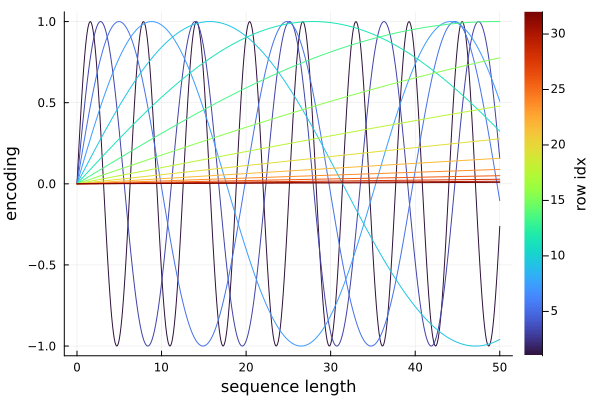

In [ ]:
p = plot()
seq_length = 50
embedding_dim = 32
colors = palette(:turbo, 1:floor(Int, embedding_dim/2))
x = 0:0.1:seq_length
for row in 0:2:(embedding_dim - 1)
    denom = 1/(1e4^(row/embedding_dim))
    y = sin.(x * denom)
    plot!(x, y, label="", color=colors[floor(Int, row/2) + 1])
end
scatter!([0], [0], zcolor=[NaN], clims=(1, embedding_dim), 
    label="", c=:turbo, markeralpha=0, colorbar_title="row idx",
) # hack to get a colorbar
plot!(xlabel="sequence length", ylabel="encoding")
#savefig("outputs/position_encoding_sin_0.png")
p

In [ ]:
function assign_colors(z, z_max, z_min)
    c = palette(:inferno, 256)
    idxs = floor.(Int, (z .- z_min) ./ (z_max - z_min) .* 255 .+ 1)
    [c[i] for i in idxs]
end

assign_colors (generic function with 1 method)

In [ ]:
row = 2# must be 0 or even

for row in 0:2:30
    plot()
    seq_length = 50
    embedding_dim = 32
    colors = palette(:turbo, 1:floor(Int, embedding_dim/2))
    x = 0:0.1:seq_length
    for row in 0:2:(embedding_dim - 1)
        denom = 1/(1e4^(row/embedding_dim))
        y = sin.(x * denom)
        plot!(x, y, label="", color=colors[floor(Int, row/2) + 1], alpha=0.4)
    end
    denom = 1/(1e4^(row/embedding_dim))
    y = sin.(x * denom)
    plot!(x, y, label="row=$(row+1)", color=assign_colors(y, 1, -1), linewidth=3)
    x = 1:seq_length
    y = sin.(x * denom)
    plot!(x, y, label="", color=assign_colors(y, 1, -1), marker=:o, linewidth=0)
    plot!(xlabel="sequence length", ylabel="encoding")
    
    #savefig("outputs/position_encoding_sin$row.png")
end

In [ ]:
for row in 0:2:(embedding_dim - 1)
    λ = 2π*(1e4^(row/embedding_dim))
    println("$row $λ")
end

0 6.283185307179586
2 11.173259061216543
4 19.869176531592203
6 35.332947520558996
8 62.83185307179586
10 111.73259061216542
12 198.691765315922
14 353.3294752055899
16 628.3185307179587
18 1117.3259061216543
20 1986.9176531592204
22 3533.2947520558987
24 6283.185307179586
26 11173.259061216542
28 19869.176531592202
30 35332.94752055899


## Simple encodings

In [ ]:
seq_length = 50
embedding_dim = 32
pe = transpose(repeat(collect(1:seq_length)./seq_length, outer=(1, embedding_dim)));

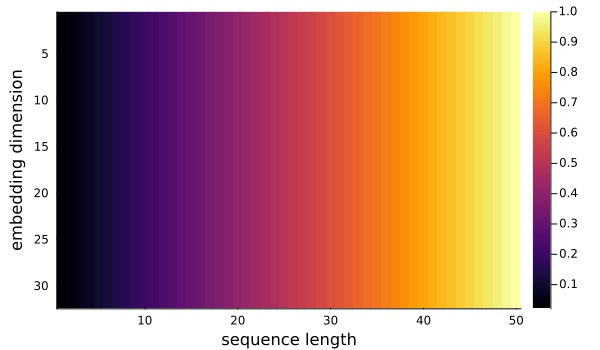

In [ ]:
heatmap(pe, aspectratio=1, 
    xlims=(0.5, size(pe,2)+0.49), 
    ylims=(0.5, size(pe,1)+0.5),
    xlabel="sequence length",
    ylabel="embedding dimension",
    yflip=true,
    size=(600, 350),
    c=:inferno
)

In [ ]:
using LinearAlgebra: diagind

In [ ]:
seq_length = 50
embedding_dim = 32
pe = zeros(embedding_dim, seq_length)
pe[diagind(pe)] .= 1;

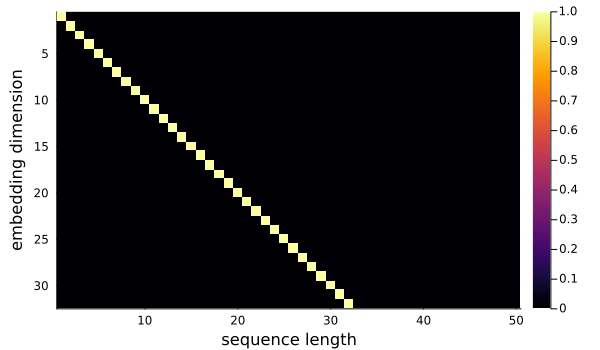

In [ ]:
heatmap(pe, aspectratio=1, 
    xlims=(0.5, size(pe,2)+0.49), 
    ylims=(0.5, size(pe,1)+0.5),
    xlabel="sequence length",
    ylabel="embedding dimension",
    yflip=true,
    size=(600, 350),
    c=:inferno
)